## What is Augmentation and how does it helps?
**Data augmentation** is a technique to increase the size and variation in a given dataset.
It is a well known fact that **Deep Neural Nets** work best if Dataset is huge in both size and variety.

Other Augumentation techniques which can be at root of such exploration is **SMOTE.**


This notebook will cover the aspect of Data Augumentation over Image Data.
Focus will be on **Various techniques** to achieve **Data augmentation** 


we will be using **Tensorflow** and **Keras** for implementation which will help us to understand the various aspect of the field.

More often when data is less in size of not having variety in it, Including **Data augmentation** in **Data preprocessing** steps, help producing larger amount of data with good amount of variety in it. 


In [1]:
import random
from shutil import copyfile

import os
import zipfile
from os import path, getcwd, chdir

## Bare minimum library requirement
import tensorflow as tf
import keras

#Keras provide API for Augmentation helps in generation
from tensorflow.keras.optimizers import RMSprop

Using TensorFlow backend.


In [ ]:
# # #Horse-or-Human
# !wget --no-check-certificate "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip" \-O "/tmp/horse-or-human.zip"

# #validation data for Horse-or-Human
# !wget --no-check-certificate "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip" \-O "/tmp/validation-horse-or-human.zip"

#Cats vs Dogs
# !wget --no-check-certificate "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip" \-O "/tmp/cats_and_dogs_filtered.zip"

#Cats-V-Dogs data from microsoft 
# !wget --no-check-certificate "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \-O "/tmp/cats-and-dogs.zip"


# #Happy or sad
# !wget --no-check-certificate "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \-O "/tmp/happy-or-sad.zip"

In [2]:
import os
import zipfile

from os import path, getcwd, chdir

local_zip = "/tmp/cats-and-dogs.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall("/tmp/")
zip_ref.close()

try:
    os.mkdir('/tmp/cats-v-dogs')
    os.mkdir('/tmp/cats-v-dogs/training')
    os.mkdir('/tmp/cats-v-dogs/testing')
    os.mkdir('/tmp/cats-v-dogs/training/cats')
    os.mkdir('/tmp/cats-v-dogs/training/dogs')
    os.mkdir('/tmp/cats-v-dogs/testing/cats')
    os.mkdir('/tmp/cats-v-dogs/testing/dogs')
except OSError:
    pass

In [3]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)

###############################################
CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

In [4]:
split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


Imagine the situation that we have to assign a category to an image that it is a **cat** or **dog** is in the image.
and in our sample data set, we have got such images where we have several cars lined up one after another.

Now how can we play with such images on the fly before giving them to model to get trained on.
Better augment them on the fly and produce a batch of tensors.

Doing the augmentation using **Keras** gives another upper hand to us, It doesn't modify or affect the original data source.

In [5]:
print("Total Cat iamge count :: ",len(os.listdir('/tmp/PetImages/Cat/')))
print("Total Dog iamge count :: ",len(os.listdir('/tmp/PetImages/Dog/')))

Total Cat iamge count ::  12501
Total Dog iamge count ::  12501


In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import imread, imshow, subplots, show
CAT_TRAINING_DIR = "/tmp/cats-v-dogs/training/cats/"
DOG_TRAINING_DIR = "/tmp/cats-v-dogs/training/dogs/"

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0



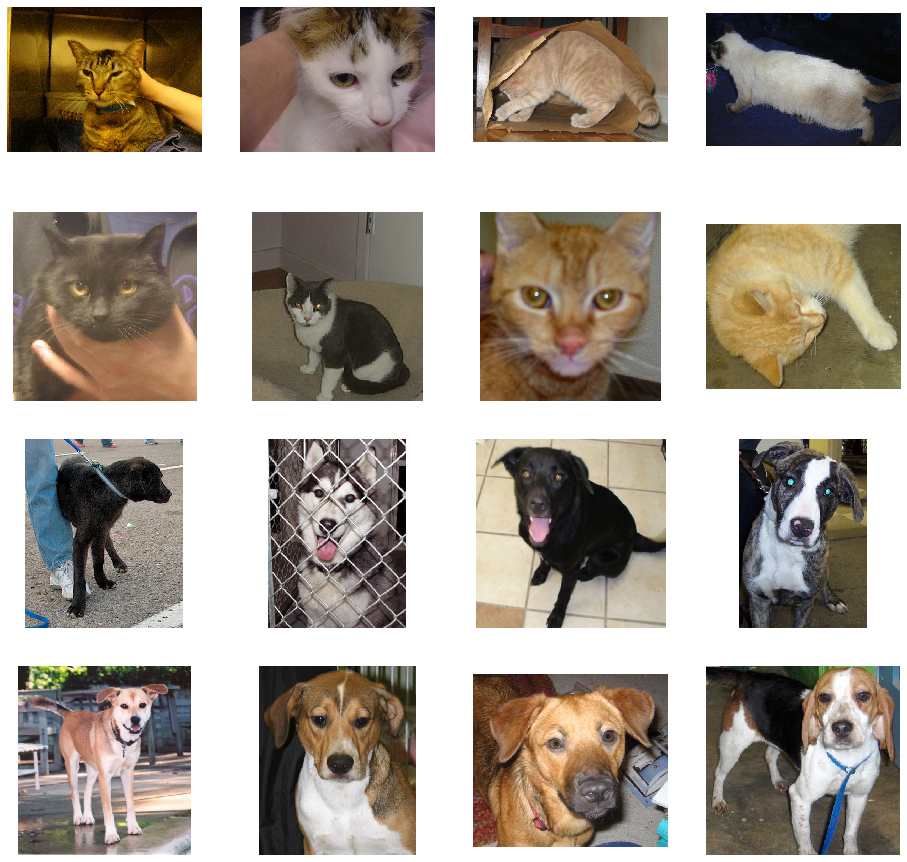

In [56]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
pic_index += 8

next_cat_pix = [os.path.join(CAT_TRAINING_DIR, fname) for fname in os.listdir('/tmp/PetImages/Cat/')[pic_index - 8:pic_index]]
next_dog_pix = [os.path.join(DOG_TRAINING_DIR, fname) for fname in os.listdir('/tmp/PetImages/Dog/')[pic_index - 8:pic_index]]

for i, img_path in enumerate(next_cat_pix + next_dog_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')  # Don't show axes (or gridlines)
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

**Let's generate an UDF which would be helpful in plotting the various augmentated images from the source image.**

In [36]:
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def plot(data_generator):
    """
    Plots 4 images generated by an object of the ImageDataGenerator class.
    """
    data_generator.fit(images)
    image_iterator = data_generator.flow(images)
    
    #Plot the images given by the iterator
    fig, rows = subplots(nrows=1, ncols=4, figsize=(18, 18))
    for row in rows:
        row.imshow(image_iterator.next()[0].astype('int'))
        row.axis('off')
    show()

Let's Do some basic augmentation and later we will apply various permutation and combination of these techniques. **Lets start with image rotation by few degrees so that features(Pixel values based on spatial arrangement) get affected and label unaffected.**

In [37]:
def imageAugmentor():
    data_generator = ImageDataGenerator(rotation_range=180)
    plot(data_generator)

    data_generator = ImageDataGenerator(featurewise_center=False,
                                        width_shift_range=0.65)
    plot(data_generator)

    data_generator = ImageDataGenerator(zoom_range=[1, 2], rotation_range=260)
    plot(data_generator)

    data_generator = ImageDataGenerator(featurewise_center=False,
                                        width_shift_range=0.65)
    plot(data_generator)

    data_generator = ImageDataGenerator(zoom_range=[1, 2], rotation_range=260)
    plot(data_generator)

    data_generator = ImageDataGenerator(vertical_flip=True,
                                        zoom_range=[0.2, 0.9],
                                        width_shift_range=0.2)
    plot(data_generator)

    data_generator = ImageDataGenerator(horizontal_flip=True,
                                        zoom_range=[1, 1.5],
                                        width_shift_range=0.2)
    plot(data_generator)

    data_generator = ImageDataGenerator(vertical_flip=True,
                                        zoom_range=[0.2, 0.9],
                                        width_shift_range=0.2)
    plot(data_generator)

    data_generator = ImageDataGenerator(rotation_range=180)
    plot(data_generator)

    data_generator = ImageDataGenerator(width_shift_range=[0.1, 0.5])
    plot(data_generator)

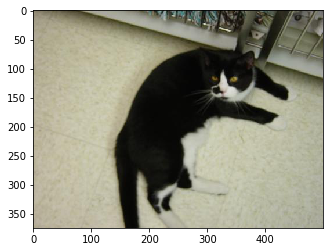

In [48]:
pic_index +=8
next_cat_pix = [os.path.join(CAT_TRAINING_DIR, fname) for fname in os.listdir('/tmp/PetImages/Cat/')[pic_index - 8:pic_index]]
image = plt.imread(next_cat_pix[0])
# Creating a dataset which contains just one image.
images = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
imshow(images[0])
show()

**Few examples regarding how image augmentation looked like before going to model for training.**

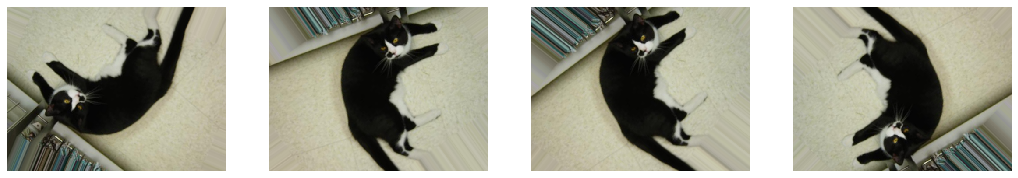

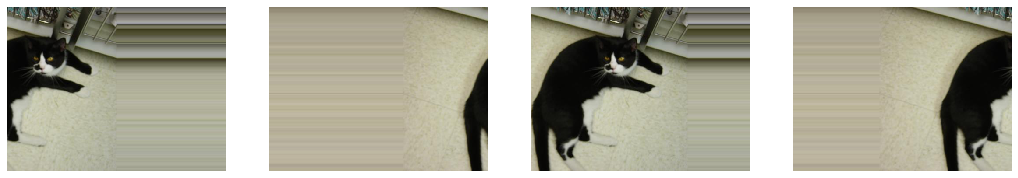

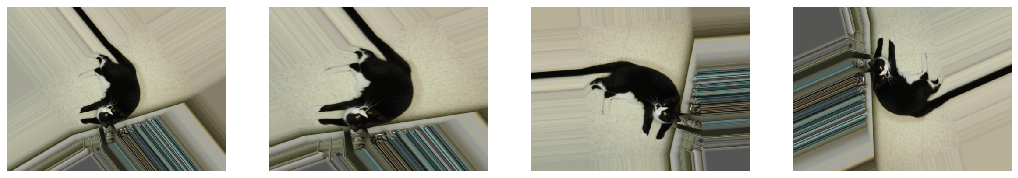

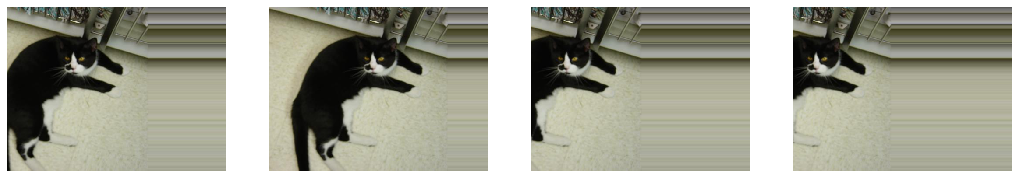

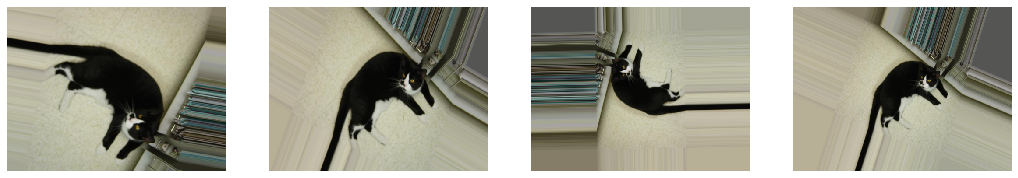

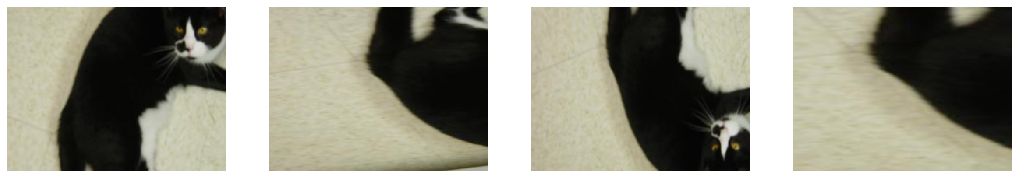

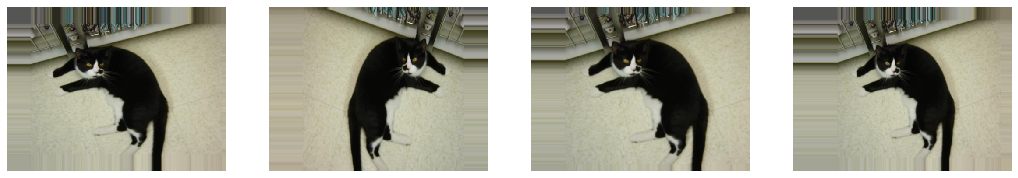

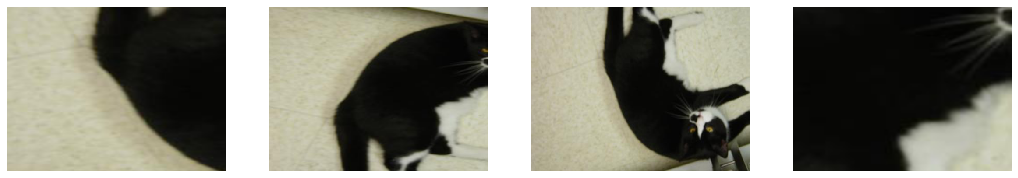

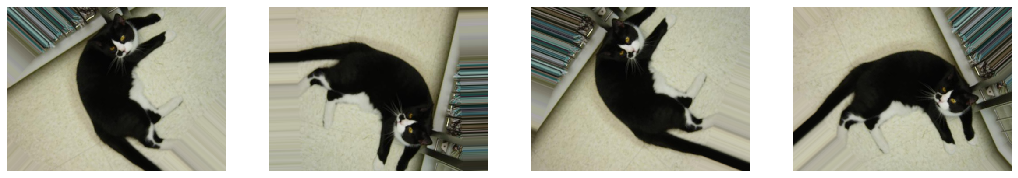

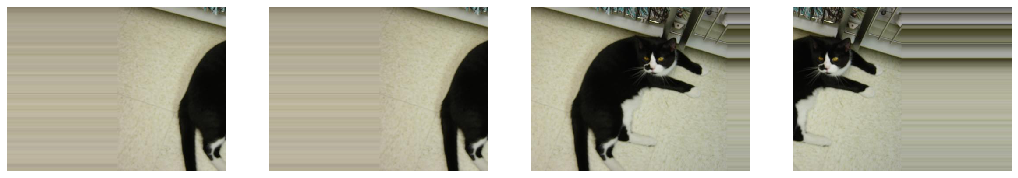

In [49]:
imageAugmentor()

<br>
<br>

## Let's examine the scenario where augmentation before training can help better at prediction time

##### Dataset we are going to use in this experiment is to detect wether given image is a human or horse

In [31]:
#Training data
training_data_path = "/tmp/cats-v-dogs/training/"

#Validation data
validation_data_path = "/tmp/cats-v-dogs/testing/"

After downloading the data, we unzipped the corpus and there exist two sub directories named **human** and **horses.**
<br>
**Let's check the number of images available for training**

In [27]:
dict = {}
for directory in os.listdir(training_data_path):
    count = 0
    for fileName in os.listdir(training_data_path + directory):
        count += 1

    dict.update({"{0}".format(directory): count})
print(dict)

{'cats': 12499, 'dogs': 12500}


From the above result it is clear that it does not matter if we chose any kinda Neural nets to train a binary classifier
it will be a weak model to give accurate prediction.
Training on such less data will also lead to **Overfitting** of model.

**Define the callback mechanism to have a hooked checkpoint mechanism over training.**

In [28]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        
        if (logs.get('accuracy') > 0.99):
            print(
                "\n\n\nGot accuracy above 0.99% so cancelling any further training! \n\nas it might cause Overfitting\n\n"
            )
            self.model.stop_training = True


callback = myCallback()

In [29]:
class NeuralNet:
    '''
    Responsible for Neural net skeleton
    '''
    '''
    Sequential design of layering to interconnect various layers.
    Hawk eye view would be
     ___________________________________________________
    |conv-->pool-->conv-->pool-->flatten-->dense-->dense|
     ---------------------------------------------------
    
    #Basic parameters to be passed on call 
    #1.training_data_path
    #2.validation_data_path
    #3.callback
    #4.epochs
    #5.batch_size
    #6.learning_rate
    '''
    
    def neuralModeling(self, training_data_path, validation_data_path,
                       callback, epochs, batch_size, learning_rate):
        model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(16, (3, 3),
                                   activation='relu',
                                   input_shape=(150, 150, 3)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dense(1, activation='sigmoid')
        ])

        #Model compilation
        model.compile(
            optimizer=RMSprop(lr=0.001),
            loss='binary_crossentropy',
            metrics=['accuracy']
        )

        #model summary
        model.summary()

        #Make datagen for Train generator
        train_datagen = ImageDataGenerator(rescale=1. / 255)

        #Train generator
        train_generator = train_datagen.flow_from_directory(
            training_data_path,
            target_size=(150, 150),
            batch_size=batch_size,
            class_mode='binary')
        
        #Make datagen for validation generator
        validation_datagen = ImageDataGenerator(rescale=1. / 255)

        #validation generator
        validation_generator = validation_datagen.flow_from_directory(
            validation_data_path,
            target_size=(150, 150),
            batch_size=batch_size,
            class_mode='binary')

        history = model.fit(train_generator,
                            validation_data=validation_generator,
                            epochs=epochs,
                            verbose=1,
                            callbacks=[callback])

        return history, model

    '''
    Constructor of the class    
    '''
    
    def __init__(self):
        print("Object getting created")

## Model Training
**Let's start the training the model and then run some image prediction directly from Google.com**

In [30]:
net = NeuralNet()
history, model = net.neuralModeling(training_data_path, validation_data_path,callback, 20, 5, 0.01)

Object getting created
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               21234176  
_________________________________________________________________
dense_1 (Dense)              (Non

/home/sachin/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/home/sachin/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/home/sachin/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/home/sachin/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/home/sachin/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:784: UserWarning: Pos

Train for 5000 steps, validate for 1721 steps
Epoch 1/20


/home/sachin/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/home/sachin/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/home/sachin/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/home/sachin/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/home/sachin/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:784: UserWarning: Pos

5000/5000 [==============================] - 1340s 268ms/step - loss: 0.6149 - accuracy: 0.6916 - val_loss: 0.5215 - val_accuracy: 0.7456
Epoch 2/20
5000/5000 [==============================] - 1271s 254ms/step - loss: 0.5372 - accuracy: 0.7525 - val_loss: 0.4502 - val_accuracy: 0.8109
Epoch 3/20
5000/5000 [==============================] - 1272s 254ms/step - loss: 0.5189 - accuracy: 0.7725 - val_loss: 0.9496 - val_accuracy: 0.6596
Epoch 4/20
5000/5000 [==============================] - 1282s 256ms/step - loss: 0.5053 - accuracy: 0.7805 - val_loss: 0.4450 - val_accuracy: 0.8138
Epoch 5/20
5000/5000 [==============================] - 1276s 255ms/step - loss: 0.5012 - accuracy: 0.7892 - val_loss: 0.4535 - val_accuracy: 0.8157
Epoch 6/20
5000/5000 [==============================] - 1305s 261ms/step - loss: 0.4908 - accuracy: 0.7927 - val_loss: 0.4463 - val_accuracy: 0.7995
Epoch 7/20
5000/5000 [==============================] - 1286s 257ms/step - loss: 0.4944 - accuracy: 0.7936 - val_loss

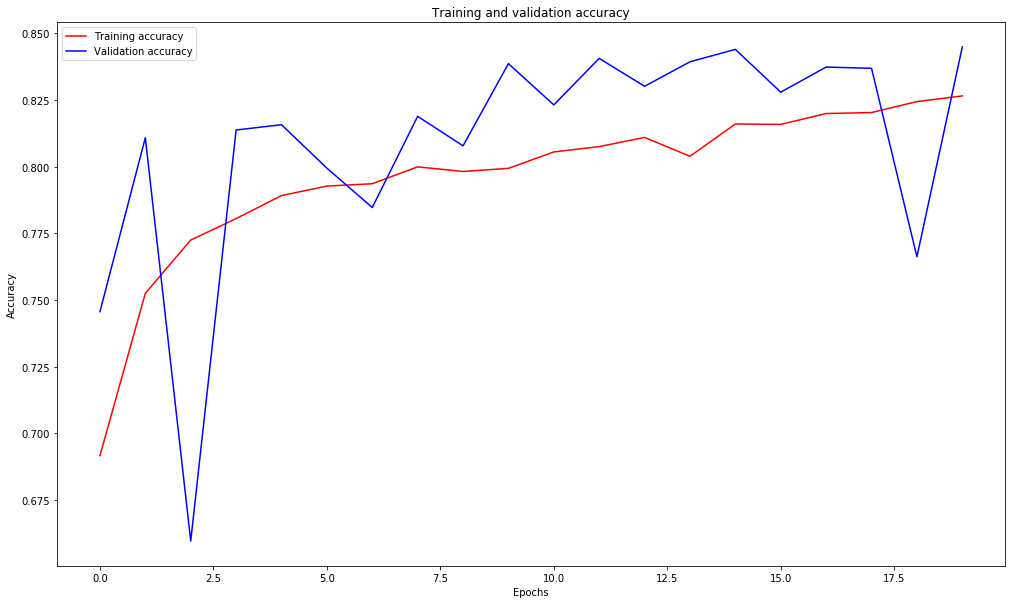

In [32]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.figure(figsize=(17,10))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc=0)
plt.show()

***Data augmentation does many changes on the fly in every image and makes a batch  before training to model.That is one of the prime reason that model training with data augmentation on is slower but effective.***

<br><br>

                                ----** The End **----